# Reproduction

## Set-up

Import required packages

In [1]:
# Import model
import model

# Data processing and figure generation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Manage file paths
from dataclasses import dataclass
import os

# Hide warnings that appear
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore')

# Import and start timer (used to record runtime of this notebook)
import time
start = time.time()

Set file paths

In [2]:
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    outputs = '../outputs'
    base_5 = 'output_base5.csv'
    base_15 = 'output_base15.csv'
    base_30 = 'output_base30.csv'
    no_rest = 'output_base15_norest.csv'
    contact_half = 'output_base15_contact20.csv'
    gloves = 'output_base15_gloves.csv'
    surgical_mask = 'output_base15_surgicalmask.csv'
    gown = 'output_base15_gown.csv'
    n95_mask = 'output_base15_n95mask.csv'

    paper = '../../original_study'
    tab2 = 'supp_tab2_reformat.csv'
    tab3 = 'supp_tab3_reformat.csv'
    tab4 = 'supp_tab4_reformat.csv'
    tab5 = 'supp_tab5_reformat.csv'
    tab6 = 'supp_tab6_reformat.csv'
    fig2 = 'fig2.png'
    fig3 = 'fig3.png'
    fig4 = 'fig4.png'

paths = Paths()

## Run model

Base scenario (15% probability of secondary infection)

In [3]:
# Run model
# res = model.run_scenarios()

# Save results to CSV
# res.to_csv(os.path.join(paths.outputs, paths.base_15), index=False)

Base scenario with 5% probability of secondary infection

In [4]:
# Run model
# res = model.run_scenarios(secondary_attack_rate=0.05)

# Save results to CSV
# res.to_csv(os.path.join(paths.outputs, paths.base_5), index=False)

Base scenario with 30% probability of secondary infection

In [5]:
# Run model
# res = model.run_scenarios(secondary_attack_rate=0.3)

# Save results to CSV
# res.to_csv(os.path.join(paths.outputs, paths.base_30), index=False)

Base scenario (15% probability of secondary infection) with only one shift per day, and without a predefined minimum rest day after shifts (to simulate random shift assignment after each shift).

In [6]:
# Run model
# res = model.run_scenarios(shift_day=[1], rest_day=False)

# Save results to CSV
# res.to_csv(os.path.join(paths.outputs, paths.no_rest), index=False)

Finished simulation [1, 2, 14, 5]
Finished simulation [1, 2, 7, 5]
Finished simulation [1, 2, 3, 5]
Finished simulation [1, 2, 21, 5]
Finished simulation [1, 2, 14, 10]
Finished simulation [1, 2, 3, 10]
Finished simulation [1, 2, 1, 5]
Finished simulation [1, 2, 7, 10]
Finished simulation [1, 2, 21, 10]
Finished simulation [1, 2, 1, 10]
Finished simulation [1, 2, 14, 20]
Finished simulation [1, 4, 3, 5]
Finished simulation [1, 4, 1, 5]
Finished simulation [1, 2, 3, 20]
Finished simulation [1, 2, 7, 20]
Finished simulation [1, 2, 21, 20]
Finished simulation [1, 2, 1, 20]Finished simulation [1, 4, 7, 5]

Finished simulation [1, 4, 1, 10]
Finished simulation [1, 4, 3, 10]
Finished simulation [1, 4, 1, 20]
Finished simulation [1, 4, 7, 10]
Finished simulation [1, 2, 14, 30]
Finished simulation [1, 4, 14, 5]
Finished simulation [1, 2, 3, 30]
Finished simulation [1, 4, 3, 20]
Finished simulation [1, 4, 14, 10]
Finished simulation [1, 4, 21, 5]
Finished simulation [1, 2, 1, 30]
Finished simul

Base scenario (15% probability of secondary infection) with contact rate halved (to simulate effect of workplace social distancing)

In [7]:
# Run model
# res = model.run_scenarios(contact_rate=0.2)

# Save results to CSV
# res.to_csv(os.path.join(paths.outputs, paths.contact_half), index=False)

Base scenario with altered probability of secondary infection (to simulate workplace protective measures)

In [8]:
# Run model
# gloves = model.run_scenarios(secondary_attack_rate=0.15*0.45)

# Save results to csv
# gloves.to_csv(os.path.join(paths.outputs, paths.gloves), index=False)

In [9]:
# Run model
# surgical_mask = model.run_scenarios(secondary_attack_rate=0.15*0.32)

# Save results to csv
# surgical_mask.to_csv(os.path.join(paths.outputs, paths.surgical_mask), index=False)

In [10]:
# Run model
# gown = model.run_scenarios(secondary_attack_rate=0.15*0.23)

# Save results to csv
# gown.to_csv(os.path.join(paths.outputs, paths.gown), index=False)

In [11]:
# Run model
# n95_mask = model.run_scenarios(secondary_attack_rate=0.15*0.09)

# Save results to csv
# n95_mask.to_csv(os.path.join(paths.outputs, paths.n95_mask), index=False)

## Import results

In [12]:
model_base15 = pd.read_csv(os.path.join(paths.outputs, paths.base_15))
paper_tab2 = pd.read_csv(os.path.join(paths.paper, paths.tab2))

model_base5 = pd.read_csv(os.path.join(paths.outputs, paths.base_5))
paper_tab3 = pd.read_csv(os.path.join(paths.paper, paths.tab3))

model_base30 = pd.read_csv(os.path.join(paths.outputs, paths.base_30))
paper_tab4 = pd.read_csv(os.path.join(paths.paper, paths.tab4))

model_contact = pd.read_csv(os.path.join(paths.outputs, paths.contact_half))
model_gloves = pd.read_csv(os.path.join(paths.outputs, paths.gloves))
model_surgical = pd.read_csv(os.path.join(paths.outputs, paths.surgical_mask))
model_gown = pd.read_csv(os.path.join(paths.outputs, paths.gown))
model_n95 = pd.read_csv(os.path.join(paths.outputs, paths.n95_mask))
paper_tab6 = pd.read_csv(os.path.join(paths.paper, paths.tab6))

## Function to compare tables

In [13]:
def compare_tables(model_tab, paper_tab):
    '''
    Combine the model and paper tables into single dataframe with a diff column

    Parameters:
    -----------
    model_tab : dataframe
        Raw output from model
    paper_tab : dataframe
        Reformatted table from supplementary materials
    '''
    # Merge the dataframes
    comp = pd.merge(
        model_tab.rename(columns={'prop_infected': 'prop_infected_model'}),
        paper_tab.rename(columns={'prop_infected': 'prop_infected_paper'}))

    # Calculate difference
    comp['diff'] = abs(comp['prop_infected_model'] -
                       comp['prop_infected_paper'])

    return comp

## Examine differences in supplementary tables

### Supplementary table 2

In [14]:
# Get table 2 and save to csv
model_tab2 = model_base15[model_base15['end_of_day'].isin([7, 14, 21])]
model_tab2.to_csv(os.path.join(paths.outputs, paths.tab2), index=False)

In [15]:
# Combine model results alongside results from paper
t2_comp = compare_tables(model_tab2, paper_tab2)

# Descriptive statistics for absolute difference in results
print(t2_comp['diff'].describe())

# Extracting instances where absolute difference is more than 0.05
display(t2_comp[t2_comp['diff'] > 0.05])

count    420.000000
mean       0.008571
std        0.016976
min        0.000000
25%        0.000000
50%        0.000000
75%        0.010000
max        0.100000
Name: diff, dtype: float64


,strength,staff_change,staff_per_shift,shifts_per_day,end_of_day,prop_infected_model,prop_infected_paper,diff
24,2,7,5,1,7,0.40,0.30,0.10
96,4,14,5,1,7,0.15,0.20,0.05
97,4,14,5,2,7,0.15,0.20,0.05
98,4,14,5,3,7,0.15,0.20,0.05
110,4,21,5,3,7,0.20,0.15,0.05
180,2,1,5,1,14,0.40,0.30,0.10
204,2,7,5,1,14,0.40,0.30,0.10
243,4,1,10,1,14,0.12,0.17,0.05
247,4,1,20,2,14,0.35,0.41,0.06
254,4,3,5,3,14,0.15,0.20,0.05


### Supplementary table 3

In [16]:
# Get table 3 and save to csv
model_tab3 = model_base5[model_base5['end_of_day'].isin([7, 14, 21])]
model_tab3.to_csv(os.path.join(paths.outputs, paths.tab3), index=False)

In [17]:
# Combine tables
t3_comp = compare_tables(model_tab3, paper_tab3)

# Descriptive statistics for absolute difference in results
print(t3_comp['diff'].describe())

# Extracting instances where absolute difference is more than 0.05
display(t3_comp[t3_comp['diff'] > 0.05])

count    420.000000
mean       0.010119
std        0.017154
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        0.100000
Name: diff, dtype: float64


,strength,staff_change,staff_per_shift,shifts_per_day,end_of_day,prop_infected_model,prop_infected_paper,diff
24,2,7,5,1,7,0.10,0.20,0.10
30,2,7,20,1,7,0.15,0.20,0.05
36,2,14,5,1,7,0.20,0.10,0.10
180,2,1,5,1,14,0.20,0.10,0.10
204,2,7,5,1,14,0.10,0.20,0.10
210,2,7,20,1,14,0.15,0.20,0.05
228,2,21,5,1,14,0.20,0.30,0.10
372,2,3,5,1,21,0.30,0.20,0.10
443,4,3,30,3,21,0.23,0.28,0.05
468,4,21,5,1,21,0.15,0.20,0.05


### Supplementary table 4

In [18]:
# Get table 4 and save to csv
model_tab4 = model_base30[model_base30['end_of_day'].isin([7, 14, 21])]
model_tab4.to_csv(os.path.join(paths.outputs, paths.tab4), index=False)

In [19]:
# Combine tables
t4_comp = compare_tables(model_tab4, paper_tab4)

# Descriptive statistics for absolute difference in results
print(t4_comp['diff'].describe())

# Extracting instances where absolute difference is more than 0.05
display(t4_comp[t4_comp['diff'] > 0.05])

count    420.000000
mean       0.004929
std        0.012860
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.100000
Name: diff, dtype: float64


,strength,staff_change,staff_per_shift,shifts_per_day,end_of_day,prop_infected_model,prop_infected_paper,diff
0,2,1,5,1,7,0.30,0.40,0.10
12,2,3,5,1,7,0.40,0.30,0.10
72,4,3,5,1,7,0.15,0.20,0.05
73,4,3,5,2,7,0.15,0.20,0.05
74,4,3,5,3,7,0.20,0.15,0.05
421,4,1,5,2,21,0.55,0.65,0.10
494,6,3,5,3,21,0.27,0.33,0.06


### Supplementary table 6

In [20]:
# Add label to each dataframe
model_contact['workplace_measure'] = 'Social distancing'
model_gloves['workplace_measure'] = 'Gloves'
model_surgical['workplace_measure'] = 'Surgical mask'
model_gown['workplace_measure'] = 'Gown'
model_n95['workplace_measure'] = 'N95 mask'

# Combine results into a single table and filter to day 14
model_tab6 = pd.concat([
    model_contact, model_gloves, model_surgical, model_gown, model_n95])
model_tab6 = model_tab6[model_tab6['end_of_day'] == 14]

# Save to csv
model_tab6.to_csv(os.path.join(paths.outputs, paths.tab6), index=False)

In [21]:
# Confirming how many are NaN, so we are sure the combined table includes all
# the relevant counts being compared
paper_tab6['prop_infected'].isnull().value_counts()

False    700
True     200
Name: prop_infected, dtype: int64

In [22]:
# Combine tables
t6_comp = compare_tables(model_tab6, paper_tab6)

# Descriptive statistics for absolute difference in results
print(t6_comp['diff'].describe())

# Extracting instances where absolute difference is more than 0.05
display(t6_comp[t6_comp['diff'] > 0.05])

count    700.000000
mean       0.005614
std        0.011337
min        0.000000
25%        0.000000
50%        0.000000
75%        0.010000
max        0.100000
Name: diff, dtype: float64


,strength,staff_change,staff_per_shift,shifts_per_day,end_of_day,prop_infected_model,workplace_measure,prop_infected_paper,diff
96,4,14,5,1,14,0.15,Social distancing,0.20,0.05
98,4,14,5,3,14,0.20,Social distancing,0.15,0.05
110,4,21,5,3,14,0.20,Social distancing,0.15,0.05
183,2,1,10,1,14,0.20,Gloves,0.15,0.05
360,2,1,5,1,14,0.20,Surgical mask,0.10,0.10
372,2,3,5,1,14,0.20,Surgical mask,0.15,0.05


## Figures

Define function to create the subplots

In [23]:
def plot_fig(fig_dict_list, ax, letter, title,
             ylabel='Proportion of staff infected', legend=True):
    '''
    Create one of the subplots from the article's figures.

    Parameters:
    -----------
    fig_dict_list : list
        List of dictionaries with parameters to filter dataframe by and for
        formatting the figure
    ax : axes object
        To create the plot on
    letter : string
        Letter of subplot (e.g. '(a)', '(b)')
    title : string
        Title for the subplot
    ylabel : string
        Title for Y axis
    legend : boolean
        Whether to include a figure legend for that subplot
    '''
    # Create each of the line plots
    for fig_dict in fig_dict_list:

        # Get the filters for the dataframe
        filt = {key: fig_dict[key] for key in [
            'shifts_per_day', 'staff_per_shift', 'strength', 'staff_change']}

        # Get subset of dataframe meeting the conditions
        query = ' & '.join([f"{col} == {val}" for col, val in filt.items()])
        subset = fig_dict['df'].query(query)

        # Reformat so ready to plot
        to_plot = subset.set_index('end_of_day')['prop_infected']

        # Plot on ax
        ax.plot(to_plot, label=fig_dict['label'], color=fig_dict['color'],
                linestyle=fig_dict['linestyle'], linewidth=3)

    # Formatting the figure to match the paper
    ax.set_title(title)
    ax.set_xlabel('Day')
    ax.set_xticks(np.arange(0, 21, 5))
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, 1)
    if legend == True:
        ax.legend(loc='upper left')
    ax.annotate(letter, xy=(-0.15, 1.1), xycoords='axes fraction')
    ax.grid()

### Figure 2

Set out parameters for each of the lines

In [24]:
fig2a_black = {
    'shifts_per_day': 1,
    'staff_per_shift': 30,
    'strength': 2,
    'staff_change': 1,
    'df': model_base15,
    'label': '2 x 30 staff/shift',
    'color': 'black',
    'linestyle': '-'
}

fig2a_green = {
    'shifts_per_day': 1,
    'staff_per_shift': 10,
    'strength': 6,
    'staff_change': 1,
    'df': model_base15,
    'label': '6 x 10 staff/shift',
    'color': '#94B454',
    'linestyle': '--'
}

fig2b_black = {
    'shifts_per_day': 2,
    'staff_per_shift': 30,
    'strength': 4,
    'staff_change': 1,
    'df': model_base15,
    'label': '4 x 30 staff/shift',
    'color': 'black',
    'linestyle': '-'
}

fig2b_green = {
    'shifts_per_day': 2,
    'staff_per_shift': 20,
    'strength': 6,
    'staff_change': 1,
    'df': model_base15,
    'label': '6 x 20 staff/shift',
    'color': '#94B454',
    'linestyle': '--'
}

fig2c_black = {
    'shifts_per_day': 3,
    'staff_per_shift': 30,
    'strength': 4,
    'staff_change': 1,
    'df': model_base15,
    'label': '4 x 30 staff/shift',
    'color': 'black',
    'linestyle': '-'
}

fig2c_green = {
    'shifts_per_day': 3,
    'staff_per_shift': 20,
    'strength': 6,
    'staff_change': 1,
    'df': model_base15,
    'label': '6 x 20 staff/shift',
    'color': '#94B454',
    'linestyle': '--'
}

fig2d_blue = {
    'shifts_per_day': 2,
    'staff_per_shift': 30,
    'strength': 4,
    'staff_change': 1,
    'df': model_base5,
    'label': '5%',
    'color': '#0D5BB7',
    'linestyle': ':'
}

fig2d_black = {
    'shifts_per_day': 2,
    'staff_per_shift': 30,
    'strength': 4,
    'staff_change': 1,
    'df': model_base15,
    'label': '15%',
    'color': 'black',
    'linestyle': '-'
}

fig2d_red = {
    'shifts_per_day': 2,
    'staff_per_shift': 30,
    'strength': 4,
    'staff_change': 1,
    'df': model_base30,
    'label': '3%',
    'color': '#C14C46',
    'linestyle': '--'
}

Create the figure

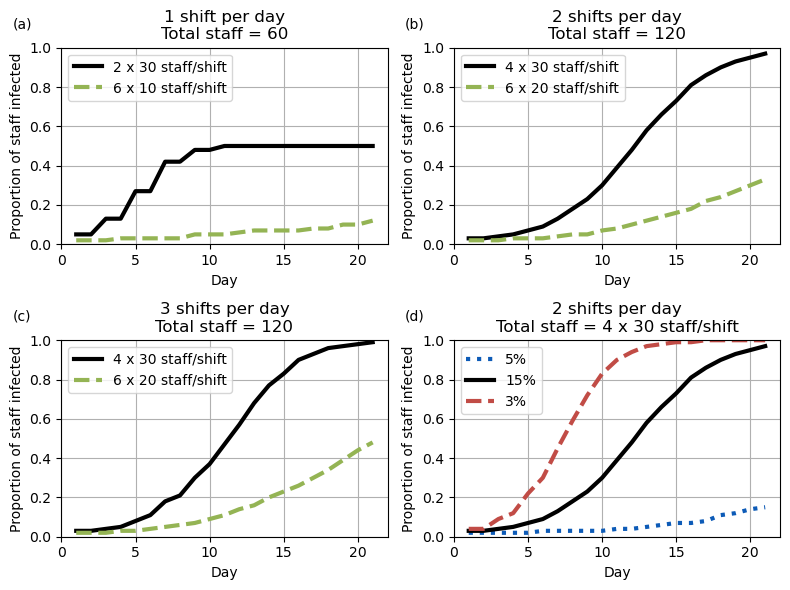

In [25]:
# Set up number of subplots and figure size
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Create the subplots
plot_fig([fig2a_black, fig2a_green], ax[0,0], letter='(a)',
          title='1 shift per day\nTotal staff = 60')
plot_fig([fig2b_black, fig2b_green], ax[0,1], letter='(b)',
          title='2 shifts per day\nTotal staff = 120')
plot_fig([fig2c_black, fig2c_green], ax[1,0], letter='(c)',
          title='3 shifts per day\nTotal staff = 120')
plot_fig([fig2d_blue, fig2d_black, fig2d_red], ax[1,1], letter='(d)',
          title='2 shifts per day\nTotal staff = 4 x 30 staff/shift')

# Prevent overlap between subplots
fig.tight_layout()

# Save the figure
plt.savefig(os.path.join(paths.outputs, paths.fig2))

# Display the figure
plt.show()

### Figure 3

Formatting for each of the four lines (which are the same for each subplot)

In [26]:
fig3_lines = [
    # Black line
    {
        'staff_per_shift': 5,
        'label': '5 staff/shift',
        'color': 'black',
        'linestyle': '-'
    },
    # Green line
    {
        'staff_per_shift': 10,
        'label': '10 staff/shift',
        'color': '#94B454',
        'linestyle': '--'
    },
    # Purple line
    {
        'staff_per_shift': 20,
        'label': '20 staff/shift',
        'color': '#7F619D',
        'linestyle': ':'
    },
    # Red line
    {
        'staff_per_shift': 30,
        'label': '30 staff/shift',
        'color': '#C14C46',
        'linestyle': '-'
    }
]

Set default parameters for each subplot

In [27]:
all_fig3 = {
    'staff_change': 1,
    'df': model_base15
}

# These are default for Figure 3 and 4, so we reuse them below
all_fig34a = {
    'shifts_per_day': 1,
    'strength': 4
}

all_fig34b = {
    'shifts_per_day': 1,
    'strength': 6
}

all_fig34c = {
    'shifts_per_day': 2,
    'strength': 4
}

all_fig34d = {
    'shifts_per_day': 2,
    'strength': 6
}

all_fig34e = {
    'shifts_per_day': 3,
    'strength': 4
}

all_fig34f = {
    'shifts_per_day': 3,
    'strength': 6
}

Combine dictionaries to get conditions for plots

In [28]:
fig3a = [{**all_fig3, **all_fig34a, **x} for x in fig3_lines]
fig3b = [{**all_fig3, **all_fig34b, **x} for x in fig3_lines]
fig3c = [{**all_fig3, **all_fig34c, **x} for x in fig3_lines]
fig3d = [{**all_fig3, **all_fig34d, **x} for x in fig3_lines]
fig3e = [{**all_fig3, **all_fig34e, **x} for x in fig3_lines]
fig3f = [{**all_fig3, **all_fig34f, **x} for x in fig3_lines]

Create the plot

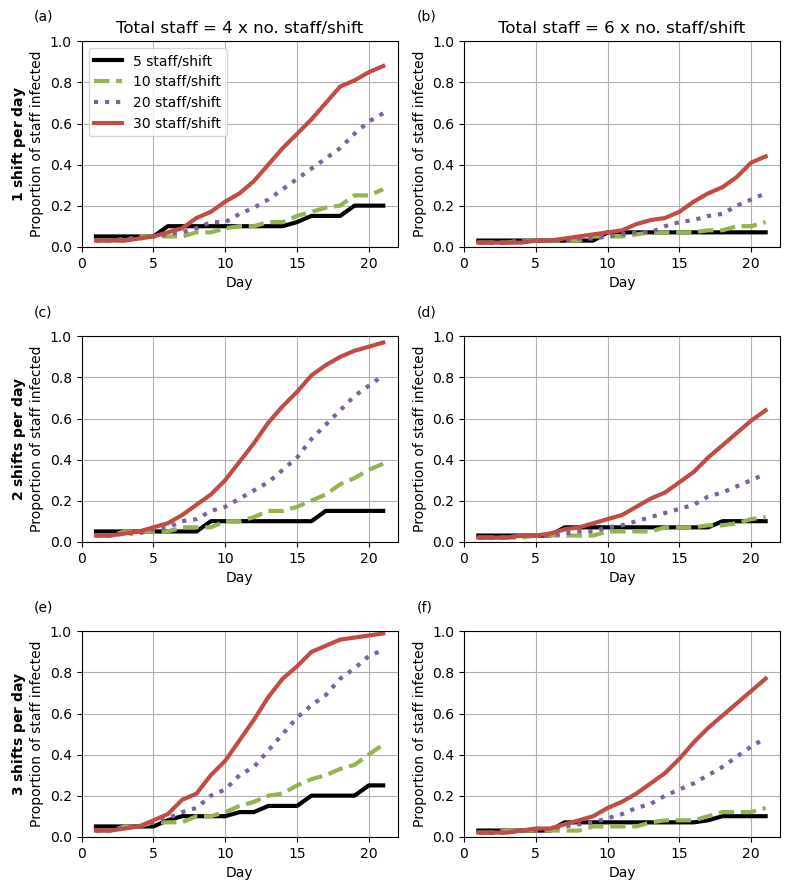

In [29]:
# Set up number of subplots and figure size
fig, ax = plt.subplots(3, 2, figsize=(8, 9))

plot_fig(fig3a, ax[0,0], title='Total staff = 4 x no. staff/shift',
         letter='(a)',
         ylabel='$\\bf{1\ shift\ per\ day}$\nProportion of staff infected')

plot_fig(fig3b, ax[0,1], letter='(b)',
         title='Total staff = 6 x no. staff/shift', legend=False)

plot_fig(fig3c, ax[1,0], letter='(c)', title='',
         ylabel='$\\bf{2\ shifts\ per\ day}$\nProportion of staff infected',
         legend=False)

plot_fig(fig3d, ax[1,1], letter='(d)', title='', legend=False)

plot_fig(fig3e, ax[2,0], letter='(e)', title='',
         ylabel='$\\bf{3\ shifts\ per\ day}$\nProportion of staff infected',
         legend=False)

plot_fig(fig3f, ax[2,1], letter='(f)', title='', legend=False)

# Prevent overlap between subplots
fig.tight_layout()

# Save the figure
plt.savefig(os.path.join(paths.outputs, paths.fig3))

# Display the figure
plt.show()

### Figure 4

Formatting for each of the five lines (which are the same for each subplot)

In [30]:
fig4_lines = [
    # Black line
    {
        'staff_change': 1,
        'label': 'Shift change after 1 day',
        'color': 'black',
        'linestyle': '-'
    },
    # Grey line
    {
        'staff_change': 3,
        'label': 'Shift change after 3 days',
        'color': '#7F7F7F',
        'linestyle': '--'
    },
    # Blue line
    {
        'staff_change': 7,
        'label': 'Shift change after 7 days',
        'color': '#0054B4',
        'linestyle': ':'
    },
    # Red line
    {
        'staff_change': 14,
        'label': 'Shift change after 14 days',
        'color': '#F20000',
        'linestyle': '-'
    },
    # Green line
    {
        'staff_change': 21,
        'label': 'Shift change after 21 days',
        'color': '#9BB05C',
        'linestyle': '--'
    }
]

Set default parameters for subplots (using some defined above, as same as Figure 3 for some)

In [31]:
all_fig4 = {
    'staff_per_shift': 20,
    'df': model_base15
}

Combine dictionaries to get conditions for plots

In [32]:
fig4a = [{**all_fig4, **all_fig34a, **x} for x in fig4_lines]
fig4b = [{**all_fig4, **all_fig34b, **x} for x in fig4_lines]
fig4c = [{**all_fig4, **all_fig34c, **x} for x in fig4_lines]
fig4d = [{**all_fig4, **all_fig34d, **x} for x in fig4_lines]
fig4e = [{**all_fig4, **all_fig34e, **x} for x in fig4_lines]
fig4f = [{**all_fig4, **all_fig34f, **x} for x in fig4_lines]

Create the plot

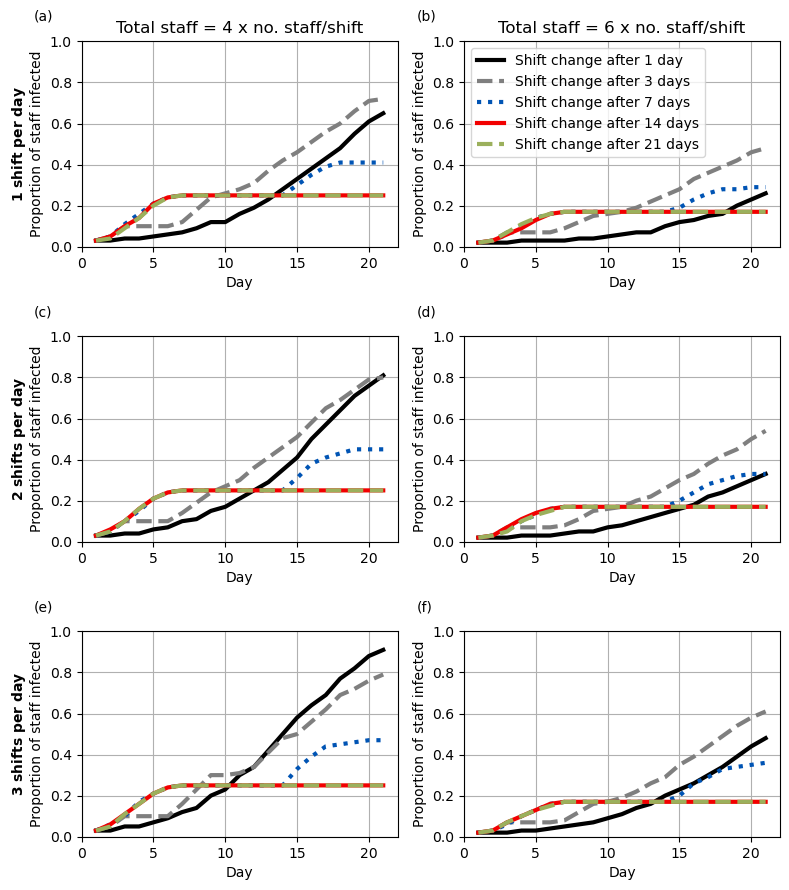

In [33]:
# Set up number of subplots and figure size
fig, ax = plt.subplots(3, 2, figsize=(8, 9))

plot_fig(fig4a, ax[0,0], letter='(a)',
         title='Total staff = 4 x no. staff/shift',
         ylabel='$\\bf{1\ shift\ per\ day}$\nProportion of staff infected',
         legend=False)

plot_fig(fig4b, ax[0,1], letter='(b)',
         title='Total staff = 6 x no. staff/shift', legend=True)

plot_fig(fig4c, ax[1,0], letter='(c)', title='',
         ylabel='$\\bf{2\ shifts\ per\ day}$\nProportion of staff infected',
         legend=False)

plot_fig(fig4d, ax[1,1], letter='(d)', title='', legend=False)

plot_fig(fig4e, ax[2,0], letter='(e)', title='',
         ylabel='$\\bf{3\ shifts\ per\ day}$\nProportion of staff infected',
         legend=False)

plot_fig(fig4f, ax[2,1], letter='(f)', title='', legend=False)

# Prevent overlap between subplots
fig.tight_layout()

# Save the figure
plt.savefig(os.path.join(paths.outputs, paths.fig4))

# Display the figure
plt.show()

## Time elapsed

In [34]:
# Find run time in seconds
end = time.time()
runtime = round(end-start)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime//60}m {runtime%60}s')

Notebook run time: 2m 13s
